# Importing required libraries

In [1]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix 

# EDA

# Importing the dataset

In [2]:
cars = pd.read_table("cars-origin.txt",sep="\t",header=0,index_col=0)

In [3]:
print(cars.shape)

(392, 6)


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 392
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           392 non-null    int64 
 1   displacement  392 non-null    int64 
 2   horsepower    392 non-null    int64 
 3   weight        392 non-null    int64 
 4   acceleration  392 non-null    int64 
 5   origin        392 non-null    object
dtypes: int64(5), object(1)
memory usage: 21.4+ KB


In [5]:
#Columns name
print(cars.columns)

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin'],
      dtype='object')


In [6]:
#columns types
print(cars.dtypes)

mpg              int64
displacement     int64
horsepower       int64
weight           int64
acceleration     int64
origin          object
dtype: object


In [7]:
cars.describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.492347,194.410714,104.469388,2977.584184,15.681122
std,7.799924,104.645191,38.491160,849.402560,2.761232
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,14.000000
50%,23.000000,151.000000,93.500000,2803.500000,16.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.000000
max,47.000000,455.000000,230.000000,5140.000000,25.000000


In [8]:
cars.origin.unique()

array(['asian', 'american', 'european'], dtype=object)

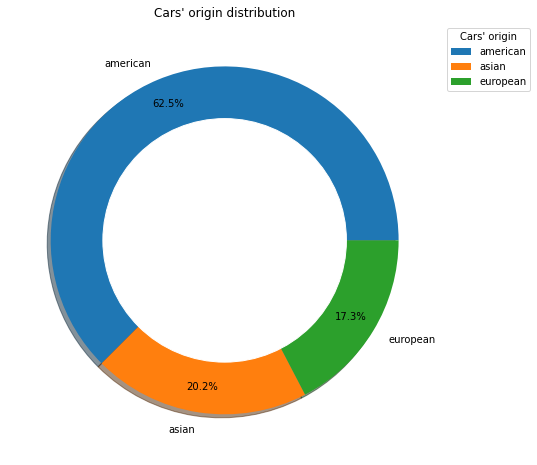

In [9]:
sizes = dict(cars['origin'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Cars' origin distribution")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Cars' origin", labels=sizes.keys(), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 392
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           392 non-null    int64 
 1   displacement  392 non-null    int64 
 2   horsepower    392 non-null    int64 
 3   weight        392 non-null    int64 
 4   acceleration  392 non-null    int64 
 5   origin        392 non-null    object
dtypes: int64(5), object(1)
memory usage: 21.4+ KB


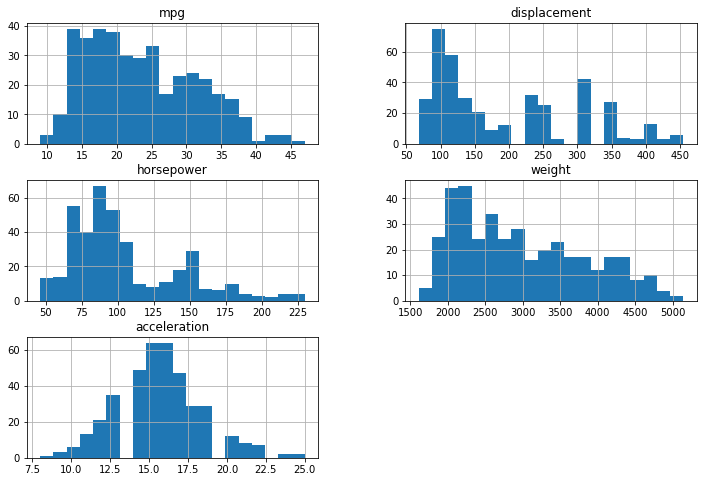

In [11]:
cars.hist(figsize=(12,8),bins=20)
plt.show()

<AxesSubplot:xlabel='mpg'>

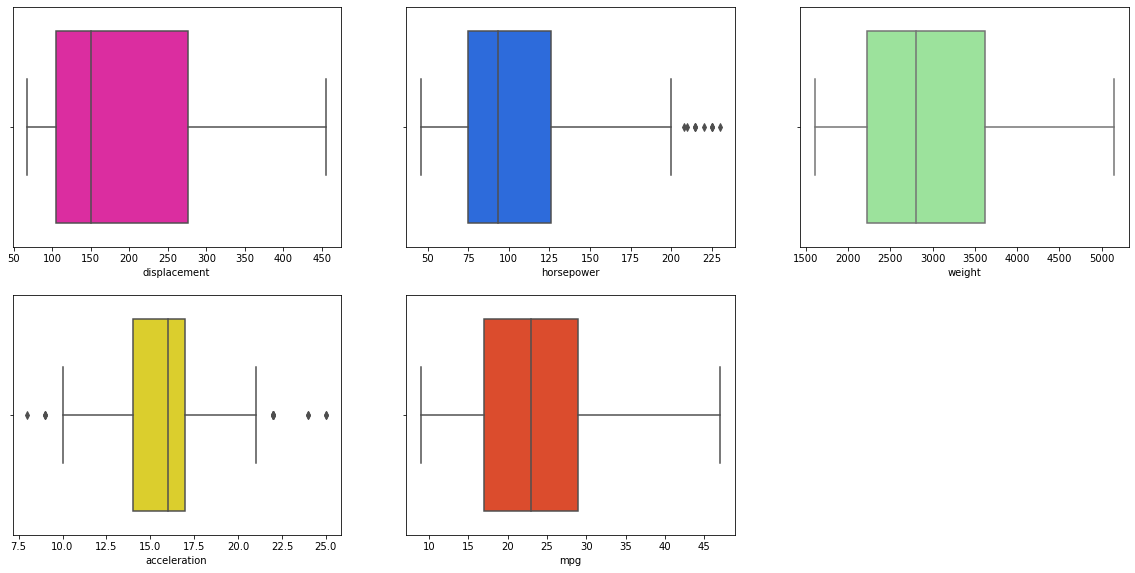

In [12]:
#using boxplots to visualise the outliers 
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.boxplot(x= cars['displacement'], color='#F810AA')

plt.subplot(3,3,2)
sns.boxplot(x= cars['horsepower'], color='#1063F8')

plt.subplot(3,3,3)
sns.boxplot(x= cars['weight'], color='lightgreen')

plt.subplot(3,3,4)
sns.boxplot(x=cars['acceleration'], color='#F8E610')
plt.subplot(3,3,5)
sns.boxplot(x=cars['mpg'], color='#F83A10')

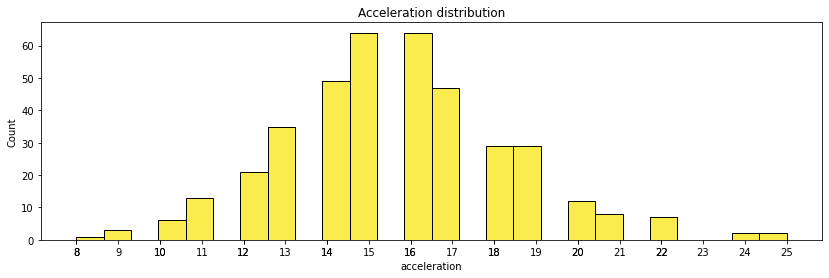

In [13]:
plt.figure(figsize=(14,4))
plt.title('Acceleration distribution')
ax = sns.histplot(cars['acceleration'].sort_values(), bins=26,color='#F8E610')
plt.xticks(np.linspace(cars['acceleration'].min(),cars['acceleration'].max(), 26, dtype=int, endpoint = True))
plt.show()

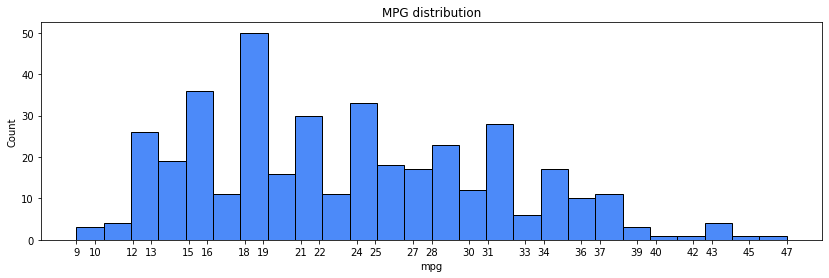

In [14]:
plt.figure(figsize=(14, 4))
plt.title('MPG distribution')
ax = sns.histplot(cars['mpg'].sort_values(), bins=26 ,color='#1063F8')
plt.xticks(np.linspace(cars['mpg'].min(),cars['mpg'].max(), 26, dtype=int, endpoint = True))
plt.show()

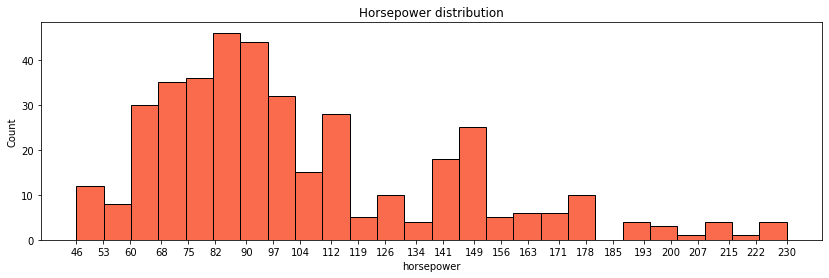

In [15]:
plt.figure(figsize=(14, 4))
plt.title('Horsepower distribution')
ax = sns.histplot(cars['horsepower'].sort_values(), bins=26 ,color='#F83A10')
plt.xticks(np.linspace(cars['horsepower'].min(),cars['horsepower'].max(), 26, dtype=int, endpoint = True))
plt.show()

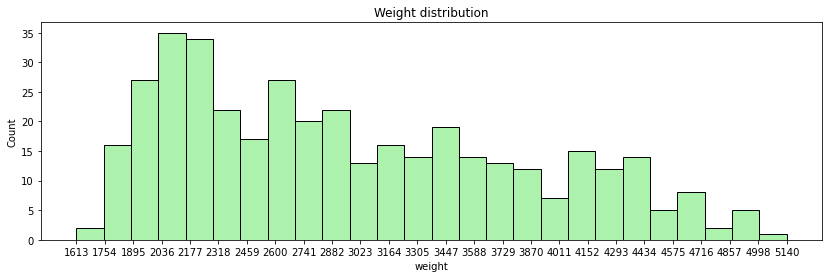

In [16]:
plt.figure(figsize=(14, 4))
plt.title('Weight distribution')
ax = sns.histplot(cars['weight'].sort_values(), bins=26 ,color='lightgreen')
plt.xticks(np.linspace(cars['weight'].min(),cars['weight'].max(), 26, dtype=int, endpoint = True))
plt.show()

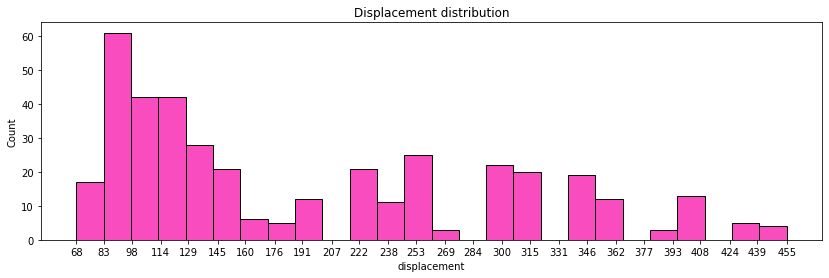

In [17]:
plt.figure(figsize=(14, 4))
plt.title('Displacement distribution')
ax = sns.histplot(cars['displacement'].sort_values(), bins=26 ,color='#F810AA')
plt.xticks(np.linspace(cars['displacement'].min(),cars['displacement'].max(), 26, dtype=int, endpoint = True))
plt.show()

### Grouping cars by origin

In [18]:
cars_origin=cars.groupby('origin',as_index=False).mean()

In [19]:
cars_origin

,origin,mpg,displacement,horsepower,weight,acceleration
0,american,20.093878,247.510204,119.048980,3372.489796,15.114286
1,asian,30.481013,102.708861,79.835443,2221.227848,16.291139
2,european,27.617647,109.632353,80.558824,2433.470588,17.014706


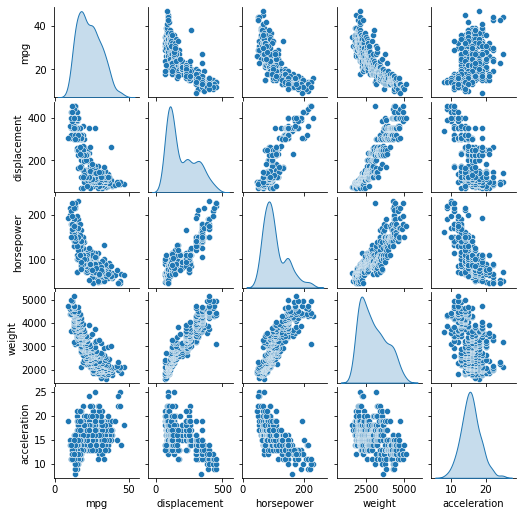

In [44]:
sns.pairplot(cars,diag_kind='kde')
plt.gcf().set_size_inches(7,7 )

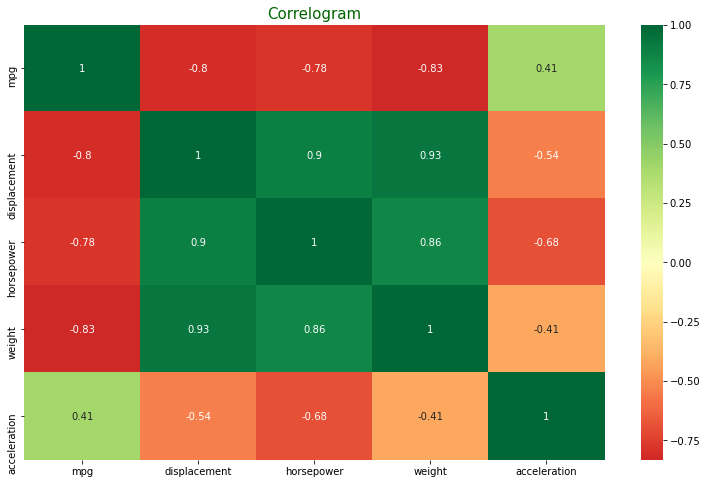

In [21]:
corr = cars.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

# Data Preprocessing

### Target encoding 

In [22]:
cars['origin'].replace({"asian":0,"american":1,"european":2})

Numero
1      0
2      0
3      0
4      0
5      0
      ..
388    1
389    1
390    1
391    1
392    1
Name: origin, Length: 392, dtype: int64

In [23]:
def BSMOTE(X,y): 
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test

In [24]:
def SMOTE(X,y):
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
   

    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_sample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test

In [25]:
def ADASYN(X,y):
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)

    return X_train, X_test, y_train, y_test

In [26]:
def SMOTESVM(X,y):
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    from matplotlib import pyplot
    from numpy import where
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = SVMSMOTE().fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test

In [27]:
y = cars['origin']
X = cars.drop('origin',axis=1)

In [28]:
sc = StandardScaler()
X_scl= sc.fit_transform(X)
#print(Z)

In [29]:
X_train, X_test, y_train, y_test= ADASYN(X_scl,y)

Counter({'american': 245, 'asian': 79, 'european': 68})
Counter({'european': 261, 'asian': 258, 'american': 245})


# Model Building

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(2,20))# Default= 30
n_neighbors = list(range(2,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=2, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 1
Best n_neighbors: 2


In [46]:
#Best parameters for KNN model
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}


In [47]:
best_result = clf.best_score_
print(best_result)

0.7808988764044944


In [33]:
knn = KNeighborsClassifier(n_neighbors=4,p=1,leaf_size=2)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

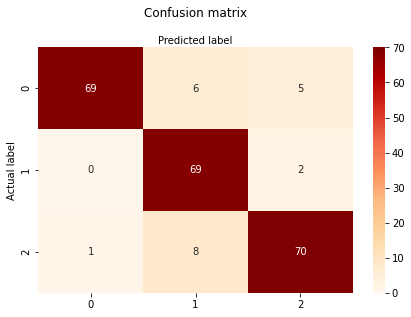

In [34]:
#SMOTESVM
conf=confusion_matrix(y_test, y_pred_knn)
class_names=[0,1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="OrRd"  ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
#ADASYN
print('ADASYN\n')
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

ADASYN

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.90


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

    american       0.99      0.86      0.92        80
       asian       0.83      0.97      0.90        71
    european       0.91      0.89      0.90        79

    accuracy                           0.90       230
   macro avg       0.91      0.91      0.90       230
weighted avg       0.91      0.90      0.90       230

